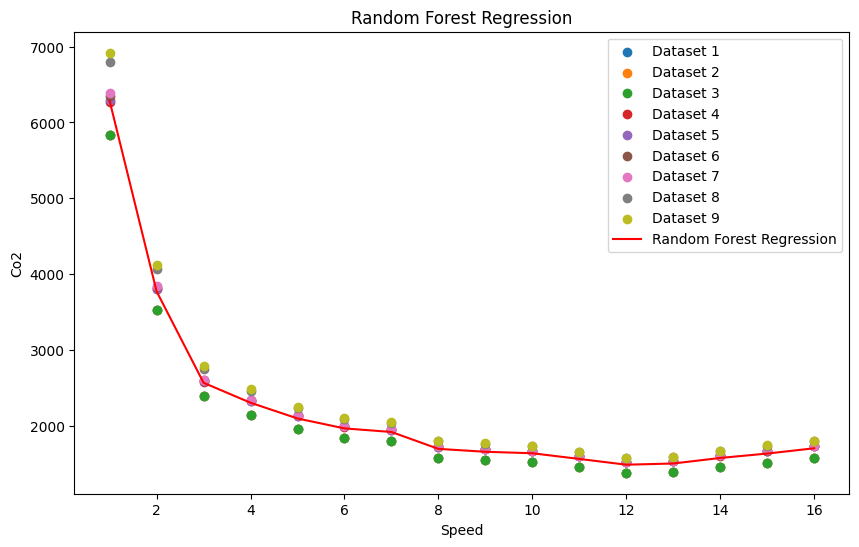

 Speed  Predicted Co2
     1    6284.326018
     2    3771.958325
     3    2566.131732
     4    2303.027573
     5    2095.501473
     6    1964.599564
     7    1917.250546
     8    1694.526766
     9    1656.362183
    10    1636.653214
    11    1561.940967
    12    1485.830846
    13    1501.644071
    14    1574.744883
    15    1632.855037
    16    1702.226381


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Assuming you have a list of Excel file paths
file_paths = [f"file{i}.xlsx" for i in range(1, 10)]
rates_datasets = []

# Read datasets from Excel files and assuming 'Co2' column for rates
for file_path in file_paths:
    df = pd.read_excel(file_path)
    rates_datasets.append(df['Co2'].values)

# Define the data for all datasets
num_speed_points = 16
speed = np.array([i for i in range(1, num_speed_points + 1)]).reshape(-1, 1)

# Combine data from all datasets
all_speed = np.concatenate([speed] * len(rates_datasets))
all_rates = np.concatenate(rates_datasets)

# Create and fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(all_speed, all_rates)

# Predict using the model
rf_predictions = rf_model.predict(all_speed)

# Plot the results
plt.figure(figsize=(10, 6))
for i, rates_dataset in enumerate(rates_datasets):
    plt.scatter(speed, rates_dataset, label=f'Dataset {i+1}')
plt.plot(speed, rf_model.predict(speed), color='red', label='Random Forest Regression')
plt.title('Random Forest Regression')
plt.xlabel('Speed')
plt.ylabel('Co2')
plt.legend()
plt.show()

# Predict CO2 values for speed using the model and create a DataFrame with the predictions
predicted_co2_values = rf_model.predict(speed)
predicted_df = pd.DataFrame({
    'Speed': speed.flatten(),
    'Predicted Co2': predicted_co2_values.flatten()
})

# Print the DataFrame
print(predicted_df.to_string(index=False))
